# Chasing Data: Massive Analysis on US Mass Shootings *created by Chase Kregor*

This is my second post on chasekregor.github.io, aka my project Chasing Data in which I share interesting data science projects. It also serves as my portfolio. 

# Analyzing Mass Shootings in The United States <a name='start' />

### Purpose:
 
To have a better understanding of mass shootings in the US. I decided to answer all the questions in the Inspiration Section on Kaggle. 

### Dataset:

The dataset contains detailed information of 398 mass shootings in the United States from 1966 to 2017.

### Source: 
[https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years](https://www.kaggle.com/zusmani/us-mass-shootings-last-50-years)

### Topics & Bookmarks:
1. ###### <a href=#start>The Top of The Notebook</a>
2. ###### <a href=#peoplekilled>How many people were killed and injured per year? </a>
3. ######  <a href=#viz>Visualize mass shootings on the U.S map</a>
4. ###### <a href=#shootercorrelation>Is there any correlation between shooter and his/her race, gender? </a>
5. ######  <a href=#timingcorrelation>Any correlation with calendar dates? Do we have more deadly days, weeks or months on average?</a>
6. ###### <a href=#cities/states>What cities and states are more prone to such attacks? </a>
7. ###### <a href=#otherdata>Can you find and combine any other external datasets to enrich the analysis, for example, gun ownership by state? </a>
8. ###### <a href=#otherpattern>Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event? </a>
9. ###### <a href=#mentalhealth> How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition? </a>
10. ###### <a href=#end>Final Results & Closing Thoughts</a>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('Mass Shootings Dataset Ver 5.csv')
data.head()

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/17,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/17,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/17,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/17,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/17,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
S#                      323 non-null int64
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null object
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null object
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender                  323 non-null object
Latitude                303 non-null float64
Longitude         

# 2: How many people were killed and injured per year?<a name='peoplekilled' />

In [4]:
fatalities = data ['Fatalities'].sum()
injured = data['Injured'].sum()

In [5]:
fperyr = fatalities / 51
iperyr = injured / 51 

In [6]:
print("From 1966 to 2017 there have been")
print("%f fatalities from mass shootings" % (fatalities))
print("%f injuries from mass shootings" % (injured))

From 1966 to 2017 there have been
1433.000000 fatalities from mass shootings
1995.000000 injuries from mass shootings


In [7]:
print("That means there have been")
print("%f fatalities due to mass shootings per year"% (fperyr))
print("and")
print("%f people injured due to mass shootings per year" % (iperyr))

That means there have been
28.098039 fatalities due to mass shootings per year
and
39.117647 people injured due to mass shootings per year


# 3: Visualize mass shootings on the U.S map <a name='viz' />

There arent many great python languages for US Maps. At least non that I currently understand. For the sake of time I completed this task on the popular WISIYG(What You See Is What You Get) Data Visualization Tool [Tableau](https://www.tableau.com/).

<img src="usmassshootings.png">

# 4: Is there any correlation between shooter and his/her race, gender?<a name='shootercorrelation' />

Instead of finding the r values for the various shooter attributes I came up with some visualizations to understand shooter distributions.

### Race

In [9]:
data['Race'].value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    9
Asian                                                    6
Latino                                                   5
Black                                                    5
black                                                    3
Native American or Alaska Native                         3
Other                                                    2
Two or more races                                        2
White American or European American/Some other Race      1
Asian American/Some other race                           1
Black American or African American/Unknown              

** Need to categorize all the different races into reasonable categories **

In [10]:
data['Race'] = data['Race'].replace(['Some other race'], ['Unknown'])
data['Race'] = data['Race'].replace(['white'], ['White American or European American'])
data['Race'] = data['Race'].replace(['White'], ['White American or European American'])
data['Race'] = data['Race'].replace(['Asian'], ['White American or European American'])
data['Race'] = data['Race'].replace(['Black'], ['Black American or African American'])
data['Race'] = data['Race'].replace(['black'], ['Black American or African American'])
data['Race'] = data['Race'].replace(['White American or European American/Some other Race'], ['Two or more races'])
data['Race'] = data['Race'].replace(['Asian American/Some other race'], ['Two or more races'])
data['Race'] = data['Race'].replace(['Black American or African American/Unknown'], ['Two or more races'])
data['Race'] = data['Race'].replace(['Other'], ['Two or more races'])

data['Race'].value_counts()

White American or European American    149
Black American or African American      84
Unknown                                 62
Asian American                          11
Two or more races                        7
Latino                                   5
Native American or Alaska Native         3
Name: Race, dtype: int64

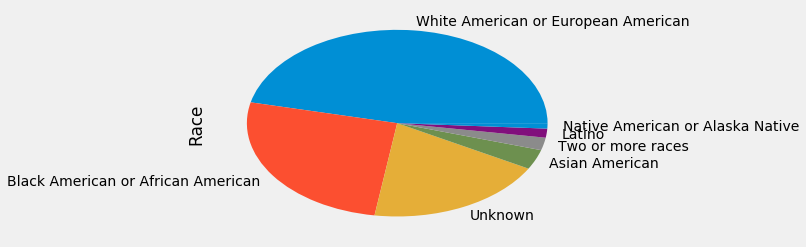

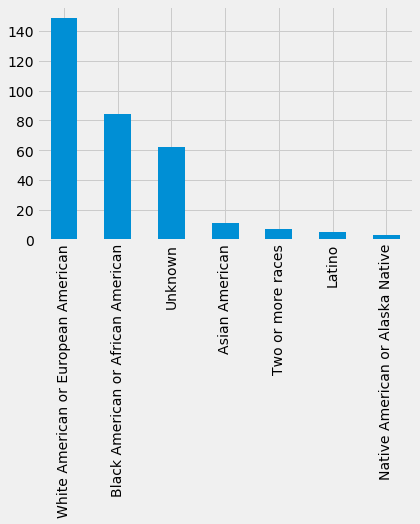

In [11]:
A = data['Race'].value_counts()
B = data['Race'].value_counts()

A.plot(kind='pie')
plt. show()
B.plot(kind='bar')
plt.show()

### Gender

In [12]:
data['Gender'].value_counts()

Male           272
Unknown         21
M               20
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [13]:
data['Gender'] = data['Gender'].replace(['M'], ['Male'])
data['Gender'] = data['Gender'].replace(['Male/Female'], ['Unknown'])
data['Gender'] = data['Gender'].replace(['M/F'], ['Unknown'])
data['Gender'] = data['Gender'].replace(['Unkown'], ['Unknown'])

data['Gender'].value_counts()

Male       292
Unknown     26
Female       5
Name: Gender, dtype: int64

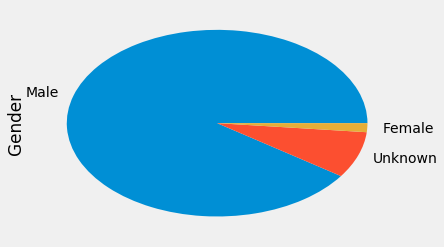

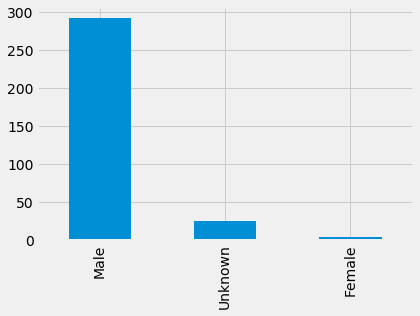

In [14]:
A = data['Gender'].value_counts()
B = data['Gender'].value_counts()

A.plot(kind='pie')
plt.show()
B.plot(kind='bar')
plt.show()

# 5: Any correlation with calendar dates? Do we have more deadly days, weeks or months on average? <a name='timingcorrelation' />

In [15]:
import time
import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data.head()


,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Year,Month,Day
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,NaN,NaN,No,White American or European American,Male,NaN,NaN,2017,11,5
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,NaN,NaN,No,White American or European American,Male,NaN,NaN,2017,11,1
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,NaN,Advance Granite Store,No,Black American or African American,Male,NaN,NaN,2017,10,18
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,NaN,NaN,Unclear,White American or European American,Male,36.181271,-115.134132,2017,10,1
4,5,San Francisco UPS shooting,"San Francisco, CA",2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,1.0,NaN,Yes,White American or European American,Male,NaN,NaN,2017,6,14


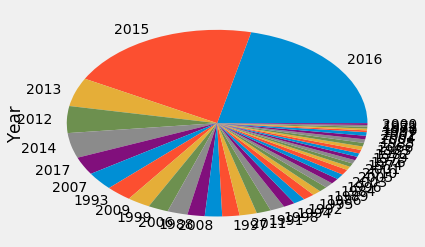

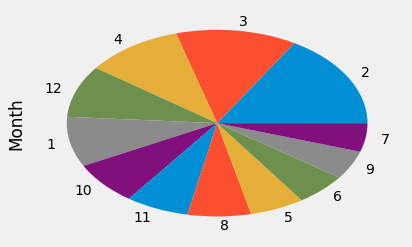

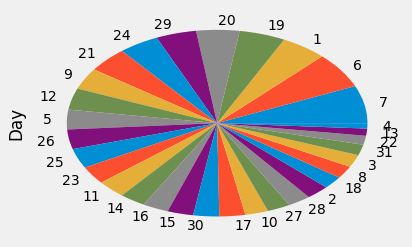

In [16]:
years = data['Year'].value_counts()
months = data['Month'].value_counts()
days = data['Day'].value_counts()

years.plot(kind='pie')
plt.show()
months.plot(kind='pie')
plt.show()
days.plot(kind='pie')
plt.show()

** FINDINGS: What we can see here is that in terms of years 2015 and 2016 were significantly worse than any other year. In terms of months you also see an interesting trend. The most mass shootings happened between December and April. Those happened to be the top 5 months AND they happen to be Winter in the United States. I think that is super interesting.I would argue that there is no real trend in the day, it is basically random which make sense.  **

# 6: What cities and states are more prone to such attacks? <a name='cities/states' />

** I decided to focus on states. **

In [17]:
data['Location']= data['Location'].astype(str)
locations = pd.DataFrame(data['Location'].str.split(',').tolist(), columns = ['City','State','blah','',','])
locations = locations[['City','State']]
locations.head()

,City,State
0,Sutherland Springs,TX
1,Thornton,CO
2,Edgewood,MD
3,Las Vegas,NV
4,San Francisco,CA


need to make the cities and states uniform

In [18]:
locations.State.unique()

array([' TX', ' CO', ' MD', ' NV', ' CA', ' PA', ' Florida', ' Ohio',
       ' California', ' WA', ' LA', ' Texas', ' Missouri', None,
       ' Virginia', ' North Carolina', ' Tennessee', ' Texas ',
       ' Kentucky', ' Alabama', ' Pennsylvania', ' Kansas',
       ' Massachusetts', '  Virginia', ' Washington', ' Arizona',
       ' Michigan', ' Mississippi', ' Nebraska', ' Colorado', ' Minnesota',
       ' Georgia', ' Maine', ' Oregon', ' South Dakota', ' New York',
       ' Louisiana', ' Illinois', ' South Carolina', ' Wisconsin',
       ' Montana', ' New Jersey', ' Indiana', ' Oklahoma', ' New Mexico',
       ' Idaho', ' Souderton', ' West Virginia', ' Nevada', ' Albuquerque',
       ' Connecticut', ' Arkansas', ' Utah', ' Lancaster', ' Vermont',
       ' San Diego', ' Hawaii', ' Alaska', ' Wyoming', ' Iowa'], dtype=object)

In [19]:
locations['State'] = locations['State'].replace([' TX'], [' Texas '])
locations['State'] = locations['State'].replace([' Texas'], [' Texas '])
locations['State'] = locations['State'].replace([' CO'], [' Colorado'])
locations['State'] = locations['State'].replace([' MD'], [' Maryland'])
locations['State'] = locations['State'].replace([' NV'], [' Nevada'])
locations['State'] = locations['State'].replace([' CA'], [' California'])
locations['State'] = locations['State'].replace([' WA'], [' Washington'])
locations['State'] = locations['State'].replace([' LA'], [' Louisiana'])
locations['State'] = locations['State'].replace([' PA'], [' Pennsylvania'])

In [20]:
locations.State.unique()

array([' Texas ', ' Colorado', ' Maryland', ' Nevada', ' California',
       ' Pennsylvania', ' Florida', ' Ohio', ' Washington', ' Louisiana',
       ' Missouri', None, ' Virginia', ' North Carolina', ' Tennessee',
       ' Kentucky', ' Alabama', ' Kansas', ' Massachusetts', '  Virginia',
       ' Arizona', ' Michigan', ' Mississippi', ' Nebraska', ' Minnesota',
       ' Georgia', ' Maine', ' Oregon', ' South Dakota', ' New York',
       ' Illinois', ' South Carolina', ' Wisconsin', ' Montana',
       ' New Jersey', ' Indiana', ' Oklahoma', ' New Mexico', ' Idaho',
       ' Souderton', ' West Virginia', ' Albuquerque', ' Connecticut',
       ' Arkansas', ' Utah', ' Lancaster', ' Vermont', ' San Diego',
       ' Hawaii', ' Alaska', ' Wyoming', ' Iowa'], dtype=object)

In [21]:
statetotals = pd.DataFrame(locations['State'].value_counts())
statetotals.head(n=10)

,State
California,30
Florida,20
Texas,18
Washington,15
Georgia,13
Arizona,11
North Carolina,11
New York,10
Ohio,10
Alabama,9


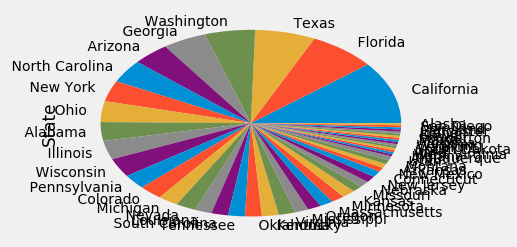

In [22]:
states = locations['State'].value_counts()

states.plot(kind='pie')
plt.show()

In [23]:
statetotals = pd.DataFrame(locations['State'].value_counts())
top20 = statetotals[0:20]

In [24]:
top20.to_csv("ratio.csv")

I used the cencus data for population to come up with which state has the highest ratio of mass shootings to population. 

https://www.census.gov/data/datasets/2016/demo/popest/state-total.html

In [25]:
dataframe = pd.read_csv("stateratios.csv")

dataframe = dataframe.sort_values('Ratio')

dataframe.head(n=10)

,State,NumberofShootings,Population,Ratio
12,Indiana,1,"6,633,053",1.510000e-07
18,Maryland,1,"6,016,447",1.660000e-07
13,Iowa,1,"3,134,693",3.190000e-07
27,New Jersey,3,"8,944,469",3.350000e-07
35,South Carolina,5,"12,784,227",3.910000e-07
32,Oklahoma,5,"11,614,373",4.310000e-07
23,Missouri,3,"6,093,000",4.920000e-07
29,New York,10,"19,745,289",5.060000e-07
43,West Virginia,1,"1,831,102",5.460000e-07
19,Massachusetts,4,"6,811,779",5.870000e-07


** FINDINGS: Indiana, Maryland, Iowa, New Jersey, South Carolina, Oklahoma, Missouri, New York, West Virginia, Massachusetts are the top 10 states to live in terms of number of mass shootings per person. This is based on the most recent population statistics from the US Census estimates.**

# 7: Can you find and combine any other external datasets to enrich the analysis, for example, gun ownership by state? <a name='otherdata' />

Did this in question 6.

# 8: Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event? <a name='otherpattern' />

The "pattern" I wanted to explore is what the causes for the mass shootings were.  

In [26]:
causes = pd.DataFrame(data['Cause'].value_counts())
causes

,Cause
psycho,68
terrorism,65
anger,44
frustration,18
domestic dispute,12
revenge,10
unemployement,10
racism,6
unknown,4
failing exams,3


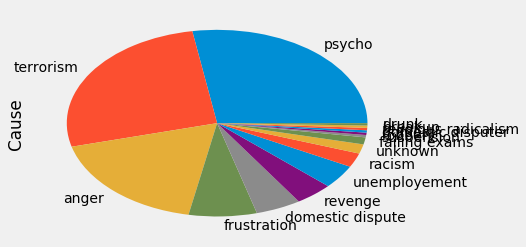

In [27]:
causes = data['Cause'].value_counts()

causes.plot(kind='pie')
plt.show()

** FINDINGS: As you can see mental issues, terrorism (another form of mental issue), and anger have been the top 3 "Causes" for mass shootings in the US in the last 50 years. **

# 9: How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition? <a name='mentalhealth' />

I decided to define mental health problems as "psycho" out of all the causes 

In [28]:
totalshooterswithcauses = causes.sum()

result = 68 / totalshooterswithcauses * 100
print("The percentage of shooters that have a mental health problems is %f percent" % (result))


The percentage of shooters that have a mental health problems is 27.642276 percent


# 10: Final Results & Closing Thoughts: <a name='end' />


## Results: 
###  How many people were killed and injured per year?

28.098039 people were killed due to mass shootings per year. 

39.117647 people were injured due to mass shootings per year

### Is there any correlation between shooter and his/her race, gender?
The answer is overwhelmingly white men. 

### Any correlation with calendar dates? Do we have more deadly days, weeks or months on average?
2015 and 2016 were the worst years for the number of mass shootings. The past 6 years have had the highest number of mass shootings per year. Also, the number of mass shootings increases in the months of December through April. This also happens to be Winter in the United States which is extremely interesting. Maybe that is linked to mental health issues?

### What cities and states are more prone to such attacks?
California, Florida, Texas, Washington, and Georgia are the top five states with the highest number of mass shootings over the past 50 years. That being said, Indiana, Maryland, Iowa, New Jersey, and South Carolina have the highest number of mass shootings per population. 

### Any other pattern you see that can help in prediction, crowd safety or in-depth analysis of the event?
Mental issues, terrorism (another form of mental issue), and anger have been the top 3 "Causes" for mass shootings in the US in the past 50 years.

### How many shooters have some kind of mental health problem? Can we compare that shooter with general population with same condition?
The percentage of shooters that have a mental health problems is 27.642276 percent.


## Closing Thoughts: 
- This notebook was created in 6 hours. I'm sure there are some errors in it. Feedback is highly encouraged!

- Also, while I didn't answer every question percisely, I answered them to the best of my data science capabilities. 

- In doing so, I hope to have proven a significant amount of depth and variety in my data science skills. 

- If you have any questions, comments, or need to get in contact with me, check out my [about page](https://chasekregor.github.io/pages/about.html). 